In [1]:
import numpy as np  # NumPy for numerical computations (arrays, matrices)
import pandas as pd  # pandas for data manipulation (DataFrames)
import matplotlib.pyplot as plt  # matplotlib for visualizations (plots)
import seaborn as sns  # seaborn for enhanced visualizations (built on top of matplotlib)

In [2]:
from sklearn.metrics import confusion_matrix  # Visualize model predictions vs. true labels
from sklearn.metrics import accuracy_score, recall_score, f1_score 

In [3]:
data_diabetes = pd.read_csv('diabetes.csv')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
data_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data_diabetes.drop_duplicates()
data_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

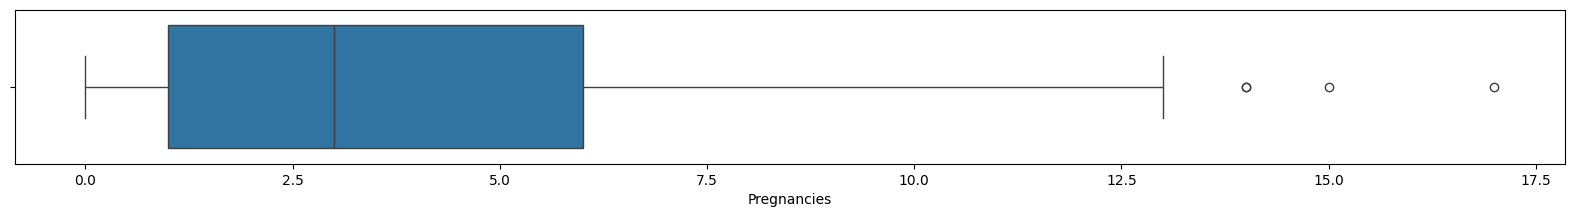

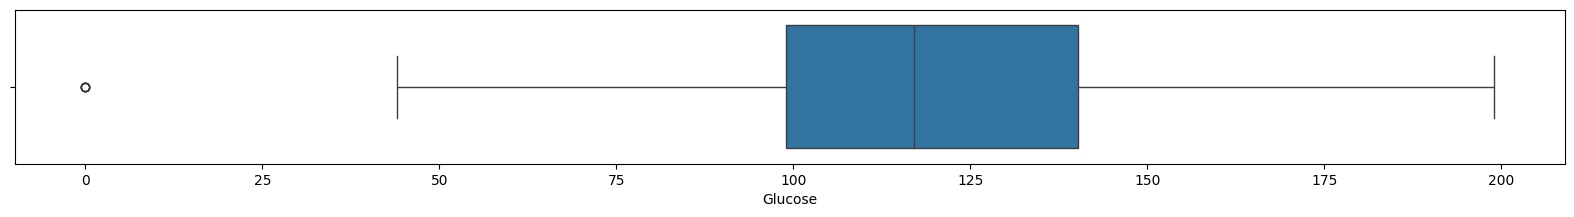

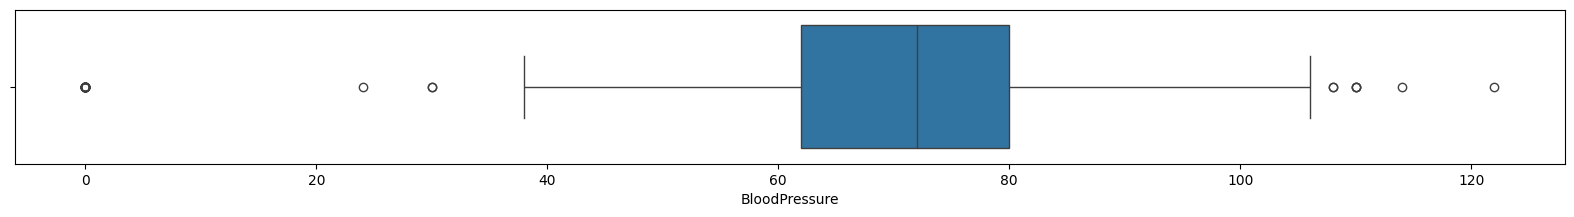

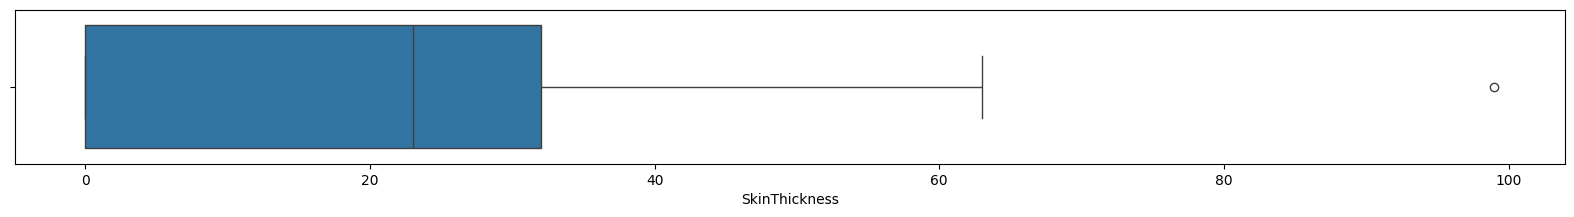

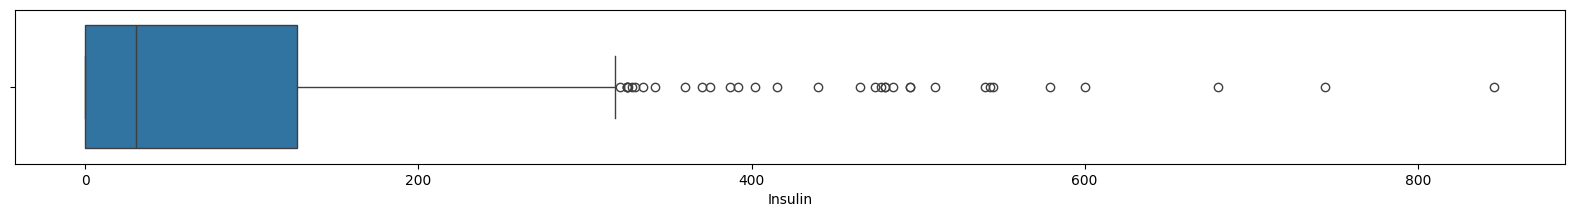

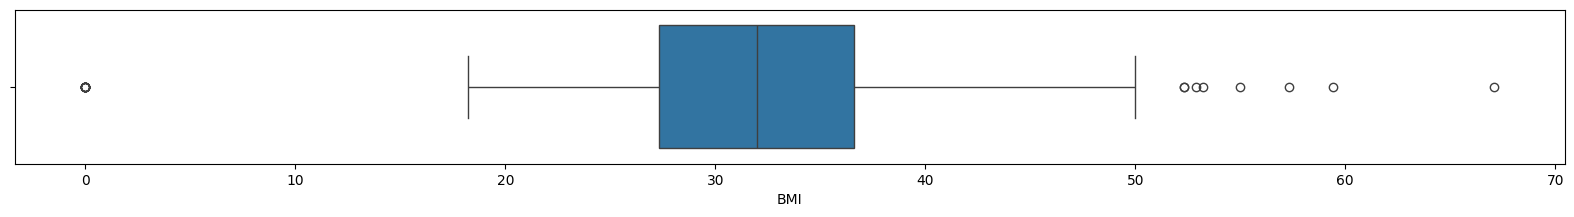

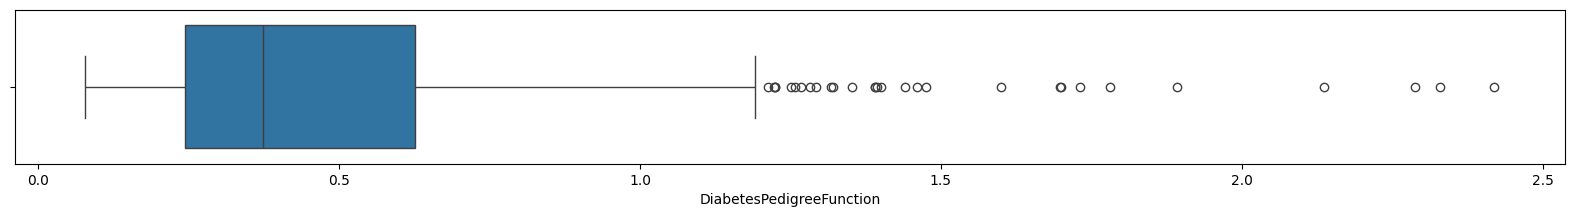

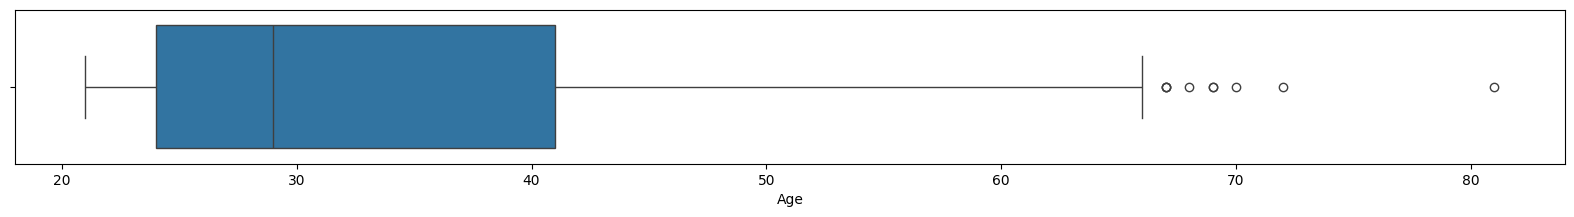

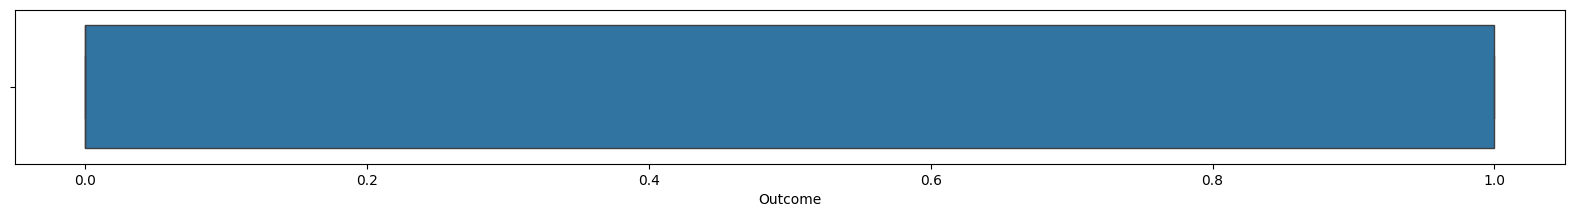

In [9]:
# Mencari Outliers - Boxplot
data_diabetes_outlier = data_diabetes
for column in data_diabetes_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=data_diabetes_outlier, x=column)

In [10]:
q1 = data_diabetes.quantile(0.25)
q3 = data_diabetes.quantile(0.75)
iqr = q3-q1
iqr

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [11]:
data_diabetes = data_diabetes[~((data_diabetes < q1 - 1.5 * iqr) | (data_diabetes > q3 + 1.5 * iqr)).any(axis=1)]

<Axes: xlabel='Outcome', ylabel='count'>

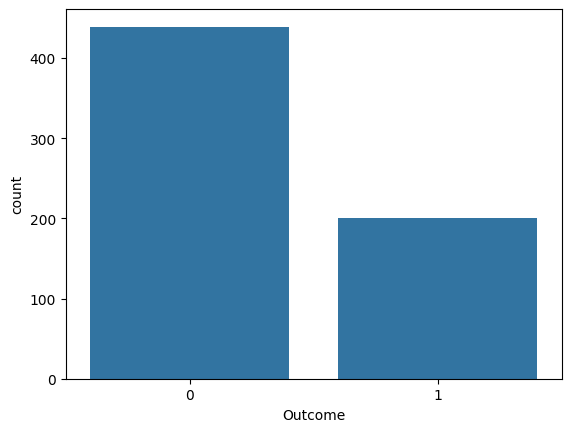

In [12]:
# Outcome countplot
sns.countplot(x = 'Outcome',data= data_diabetes)

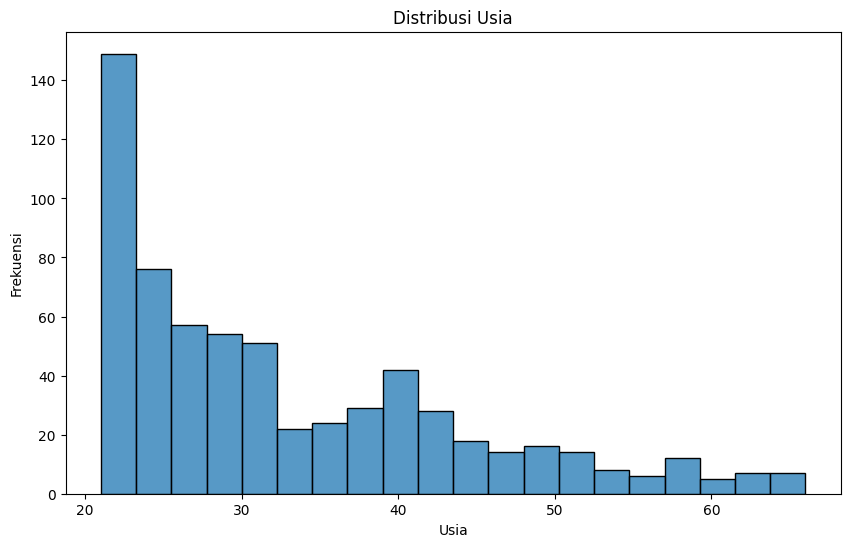

In [13]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=data_diabetes, x='Age', bins=20)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

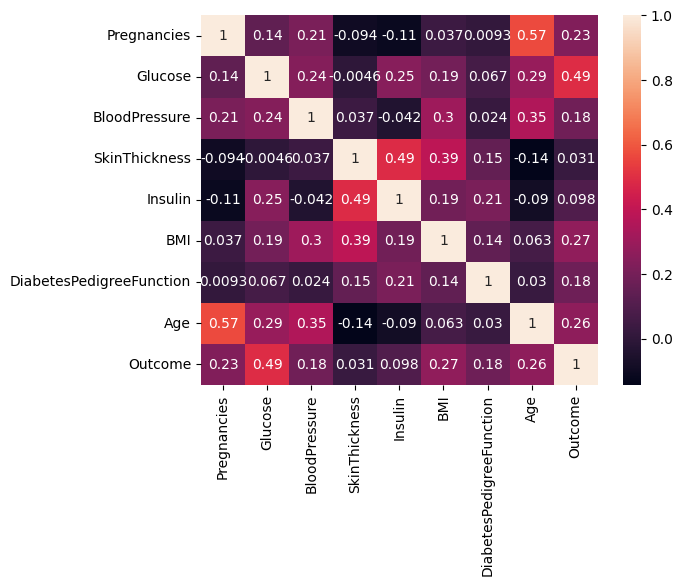

In [14]:
# Heatmap
sns.heatmap(data_diabetes.corr(), annot = True)
plt.show()

In [15]:
# Selecting features - [Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
X = data_diabetes.iloc[:, 0:8].values
Y = data_diabetes.iloc[:, 8].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

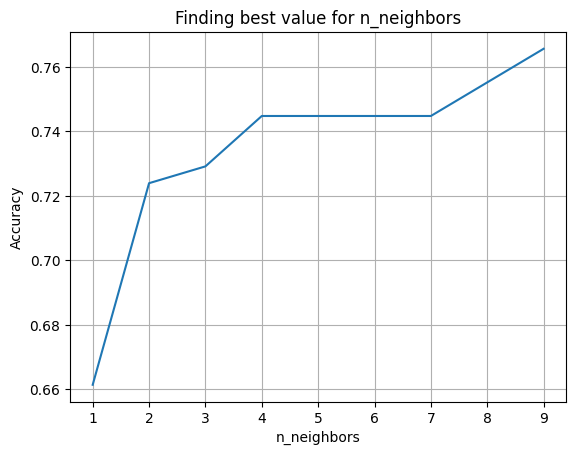

Highest value:  0.765625


In [23]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X_axis = list(range(1, 10))
acc = []

for i in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors=i) 
    knn_model.fit(x_train, y_train)
    prediction = knn_model.predict(x_test)
    acc.append(metrics.accuracy_score(prediction, y_test))

plt.plot(X_axis, acc)
plt.xticks(range(1, 10))
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value: ', max(acc))


In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=9) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1]


In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[116  15]
 [ 30  31]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       131
           1       0.67      0.51      0.58        61

    accuracy                           0.77       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



Predicted,0,1,All
Actual,,,
0,116,15,131
1,30,31,61
All,146,46,192


In [27]:
accuracy_knn = accuracy_score(y_test, y_pred)

In [28]:
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 76.5625
